In [1]:
import sys
sys.path.append("/Users/09cra/Documents/AlternateZFit")
from ast import main
from copyreg import pickle
import numpy as np
from Constants import *
from Dataset import Dataset
from Models import *
from DatasetFactory import DatasetFactory
from Bootstrapper import *
import warnings
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
allZResults = {}  # Create an empty dictionary
for i in range(10):
    with open('z_outdata_p2_{}.pkl'.format(i), 'rb') as f:#'z_outdata_splitreg_{}.pkl'
        allZResults.update(pickle.load(f))
        
allAltResults = {}  # Create an empty dictionary
for i in range(10):
    with open('alt_outdata_p2_{}.pkl'.format(i), 'rb') as f:#'alt_outdata_splitreg_{}.pkl'
        allAltResults.update(pickle.load(f))


In [3]:
counter = 0
allZResults_list = np.zeros(len(allZResults),dtype= object)
allAltResults_list = np.zeros(len(allAltResults),dtype= object)
keylist = []
for key in allZResults.keys():
    keylist.append(key)
    #print(key)
    allZResults_list[counter] = np.array(allZResults[key][:])
    allAltResults_list[counter] = np.array(allAltResults[key][:])
    counter += 1


In [4]:
allZResults_list[0].shape

(500, 5)

In [5]:
def smallestinq2gap(inq2: tuple):
    inq2zero, inq2plus = inq2

    diff = np.inf
    if inq2zero[1] - inq2zero[0] < diff:
        diff = - inq2zero[0] + inq2zero[1]
    if inq2zero[2] - inq2zero[1] < diff:
        diff = - inq2zero[1] + inq2zero[2]
    if inq2plus[1] - inq2plus[0] < diff:
        diff = - inq2plus[0] + inq2plus[1]
    return diff

In [6]:
def input_spread(inq2: tuple):
    inq2zero, inq2plus = inq2

    diff = 0
    if inq2zero[2] - inq2zero[0] > diff:
        diff = - inq2zero[0] + inq2zero[2]
    if inq2plus[1] - inq2plus[0] > diff:
        diff = - inq2plus[0] + inq2plus[1]
    if inq2plus[1] - inq2zero[0] > diff:
        diff = - inq2zero[0] + inq2plus[1]
    if inq2zero[2] - inq2plus[0] > diff:
        diff = - inq2plus[0] + inq2zero[2]
    return diff

In [7]:
allZResults_array = np.zeros((5,len(allZResults_list),500))
allAltResults_array = np.zeros((5,len(allAltResults_list),500))

print(len(allZResults_list))
for i in range(len(allZResults_list)):
    for j in range(500):
        for k in range(5):
            allZResults_array[k,i,j] = allZResults_list[i][j][k]
            allAltResults_array[k,i,j] = allAltResults_list[i][j][k]
allZResults_array = np.reshape(allZResults_array,(5,100000))
allAltResults_array = np.reshape(allAltResults_array,(5,100000))

200


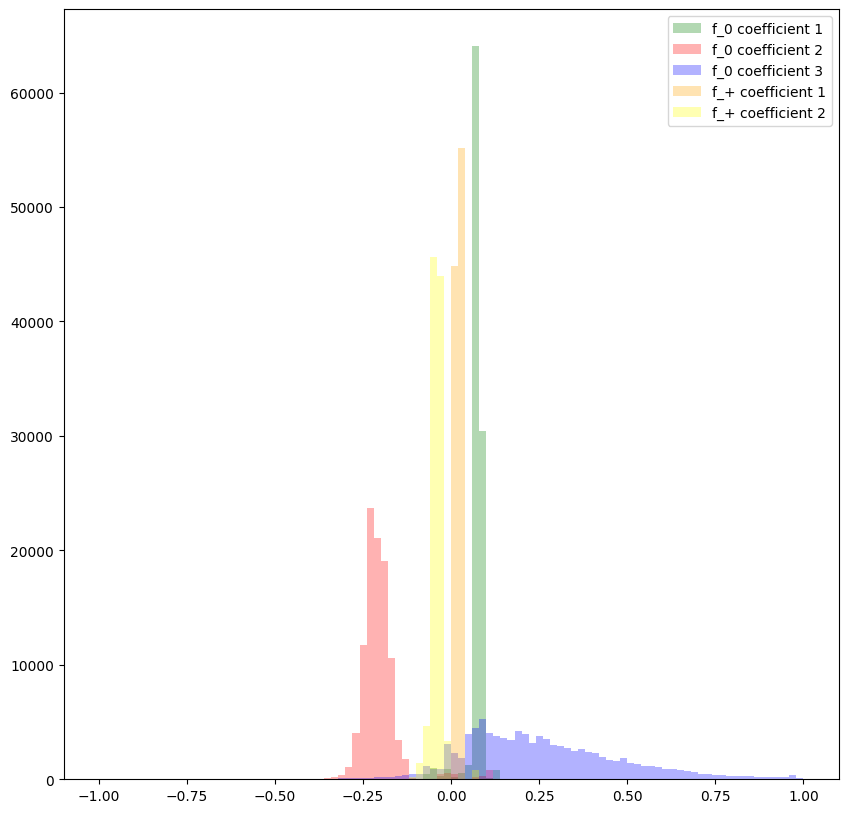

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(allZResults_array[0,:],bins = 100,range=[-1, 1],color = "green",alpha=0.3, label = "f_0 coefficient 1")
plt.hist(allZResults_array[1,:],bins = 100,range=[-1, 1],color = "red",alpha=0.3, label = "f_0 coefficient 2")
plt.hist(allZResults_array[2,:],bins = 100,range=[-1, 1],color = "blue",alpha=0.3, label = "f_0 coefficient 3")
plt.hist(allZResults_array[3,:],bins = 100,range=[-1, 1],color = "orange",alpha=0.3, label = "f_+ coefficient 1")
plt.hist(allZResults_array[4,:],bins = 100,range=[-1, 1],color = "yellow",alpha=0.3, label = "f_+ coefficient 2")
plt.legend()
plt.show()

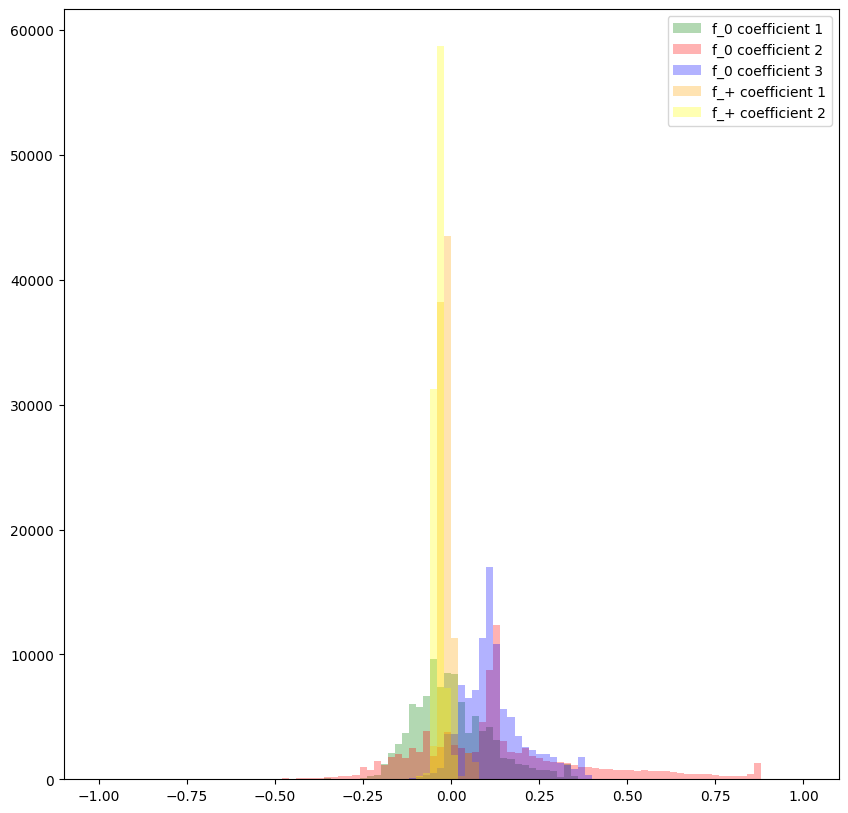

In [9]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(allAltResults_array[0,:], bins = 100,range=[-1, 1], color = "green", alpha=0.3, label = "f_0 coefficient 1")
plt.hist(allAltResults_array[1,:], bins = 100,range=[-1, 1], color = "red", alpha=0.3, label = "f_0 coefficient 2")
plt.hist(allAltResults_array[2,:], bins = 100,range=[-1, 1], color = "blue", alpha=0.3, label = "f_0 coefficient 3")
plt.hist(allAltResults_array[3,:], bins = 100,range=[-1, 1], color = "orange", alpha=0.3, label = "f_+ coefficient 1")
plt.hist(allAltResults_array[4,:], bins = 100,range=[-1, 1], color = "yellow", alpha=0.3, label = "f_+ coefficient 2")
plt.legend()
plt.show()

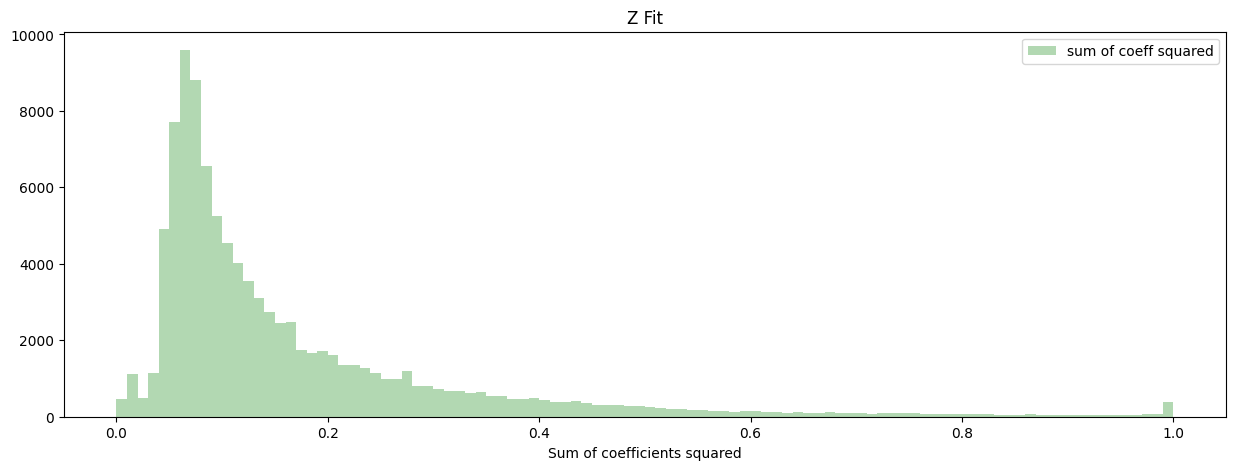

In [10]:
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(np.sum(np.multiply(allZResults_array,allZResults_array),axis = 0),bins = 100,range=[0, 1],color = "green",alpha=0.3, label = "sum of coeff squared")
plt.title("Z Fit")
plt.legend()
plt.xlabel("Sum of coefficients squared")
plt.show()

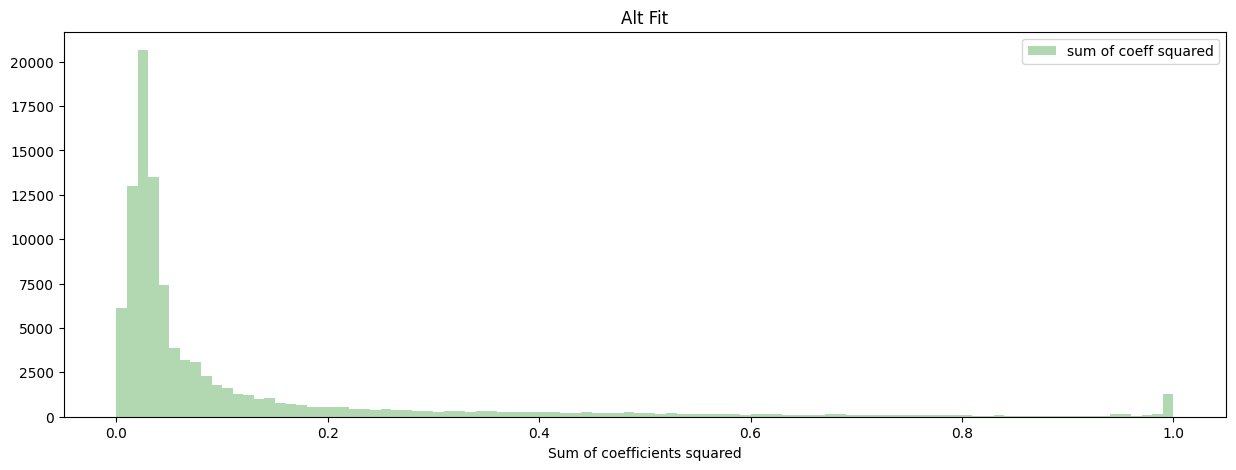

In [11]:
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(np.sum(np.multiply(allAltResults_array,allAltResults_array),axis = 0),bins = 100,range=[0, 1],color = "green",alpha=0.3, label = "sum of coeff squared")
plt.title("Alt Fit")
plt.legend()
plt.xlabel("Sum of coefficients squared")
plt.show()

In [12]:
plt.rcParams["figure.figsize"] = (10,10)

model = AltModel(3,2)
model.ffat0(allAltResults_array[:,0])

0.2113947278163458

In [13]:
model = ZFitModel(3,2)
model.ffat0(allZResults_array[:,0])
altmodel = AltModel(3,2)

In [14]:
z_ffsatzero = [(model.ffat0(allZResults_array[:,i]),smallestinq2gap(keylist[int(i/500)])) for i in range(np.shape(allZResults_array[:,:])[1])]
alt_ffsatzero = [(altmodel.ffat0(allAltResults_array[:,i]),smallestinq2gap(keylist[int(i/500)])) for i in range(np.shape(allAltResults_array[:,:])[1])]

plt.hist(z_ffsatzero, bins=100, alpha = 0.5, label = "ZFit")
plt.hist(alt_ffsatzero, bins=100, alpha = 0.5, label = "Alt Fit")
plt.legend()
plt.show()

In [15]:
z_ffsatzero[0]

(0.2332401935743434, 1.251038744799395)

<AxesSubplot: >

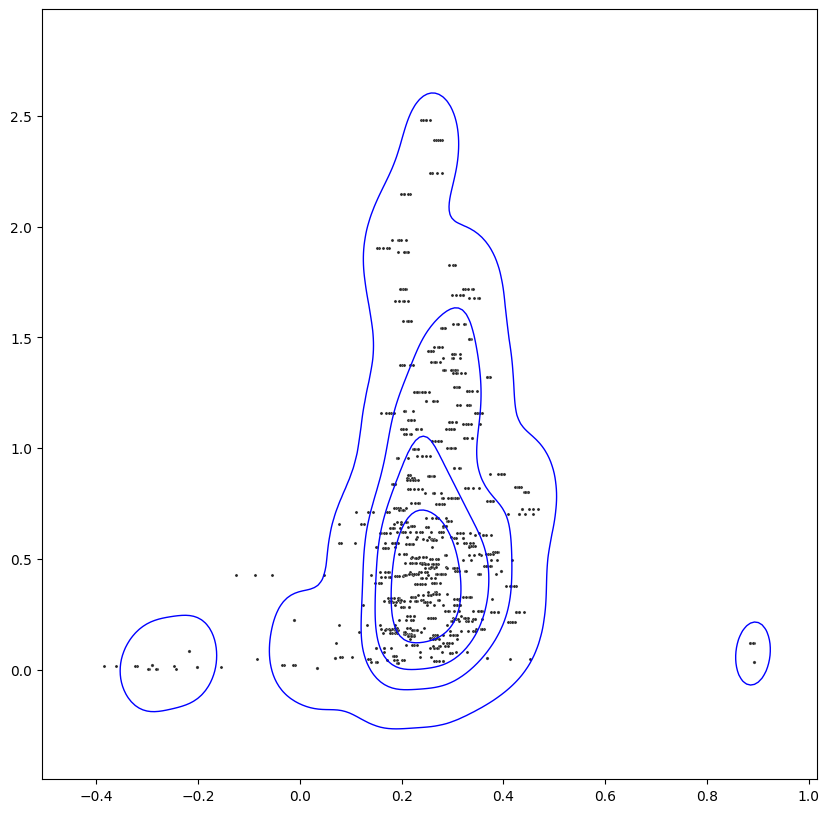

In [16]:
x = np.array(z_ffsatzero)[::100,0]
y = np.array(z_ffsatzero)[::100,1]
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.kdeplot(x=x, y=y, levels=5, color="b", linewidths=1)

In [17]:
np.shape(np.array(z_ffsatzero))[0]

100000

In [18]:
df = pd.DataFrame({"z ffs at zero":np.array(z_ffsatzero)[:,0],"index":range(np.shape(np.array(z_ffsatzero))[0])})

df["inputs"] = df.apply(lambda row: keylist[int(row["index"]/500)], axis = 1)

df = df.drop("index",axis = 1)

df["Smallest input separation"] = df.apply(lambda row: smallestinq2gap(row["inputs"]),axis = 1)

summarydf = pd.DataFrame()
summarydf["Mean"] = df[["inputs","z ffs at zero"]].groupby("inputs").mean()
summarydf["Standard Deviation"] = df[["inputs","z ffs at zero"]].groupby("inputs").std()

summarydf = summarydf.reset_index()
summarydf["Smallest input separation"] = summarydf.apply(lambda row: smallestinq2gap(row["inputs"]),axis = 1)
summarydf["Input Spread"] = summarydf.apply(lambda row: input_spread(row["inputs"]),axis = 1)

In [19]:
filterval = 0
filtereddata = summarydf[summarydf["Smallest input separation"]>filterval]
totalmean= np.mean(filtereddata["Mean"])
df_filtered = df[df["Smallest input separation"]>filterval]
totalstddev = np.std(df_filtered["z ffs at zero"])
print(totalmean, totalstddev)


0.24998191849136725 0.1280100470048552


In [20]:
altdf = pd.DataFrame({"z ffs at zero":np.array(alt_ffsatzero)[:,0],"index":range(np.shape(np.array(alt_ffsatzero))[0])})

altdf["inputs"] = altdf.apply(lambda row: keylist[int(row["index"]/500)], axis = 1)

altdf = altdf.drop("index",axis = 1)

altdf["Smallest input separation"] = altdf.apply(lambda row: smallestinq2gap(row["inputs"]),axis = 1)

altsummarydf = pd.DataFrame()
altsummarydf["Mean"] = altdf[["inputs","z ffs at zero"]].groupby("inputs").mean()
altsummarydf["Standard Deviation"] = altdf[["inputs","z ffs at zero"]].groupby("inputs").std()

altsummarydf = altsummarydf.reset_index()
altsummarydf["Smallest input separation"] = altsummarydf.apply(lambda row: smallestinq2gap(row["inputs"]),axis = 1)
altsummarydf["Input Spread"] = altsummarydf.apply(lambda row: input_spread(row["inputs"]),axis = 1)

In [21]:
altfiltereddata = altsummarydf[altsummarydf["Smallest input separation"]>filterval]
alttotalmean= np.mean(altfiltereddata["Mean"])
altdf_filtered = altdf[altdf["Smallest input separation"]>filterval]
alttotalstddev = np.std(altdf_filtered["z ffs at zero"])
print(alttotalmean, alttotalstddev)


0.2873503035073246 0.10917406364717618


<AxesSubplot: xlabel='Mean', ylabel='Count'>

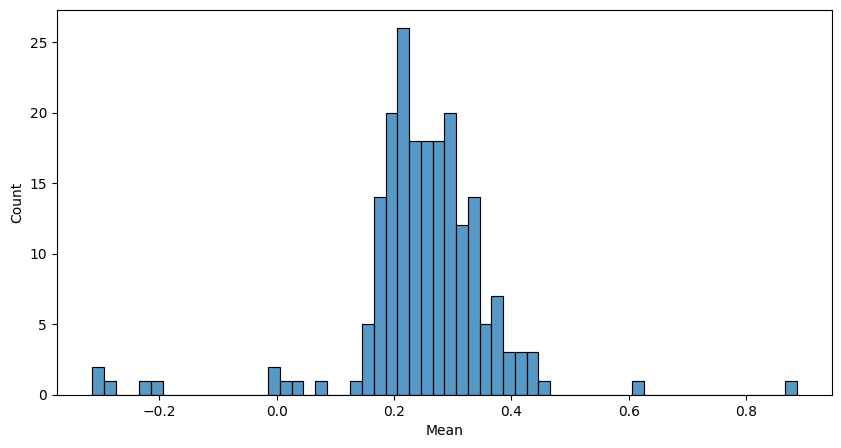

In [27]:
sns.histplot(data = filtereddata["Mean"],binwidth=0.02)

<AxesSubplot: xlabel='Mean', ylabel='Count'>

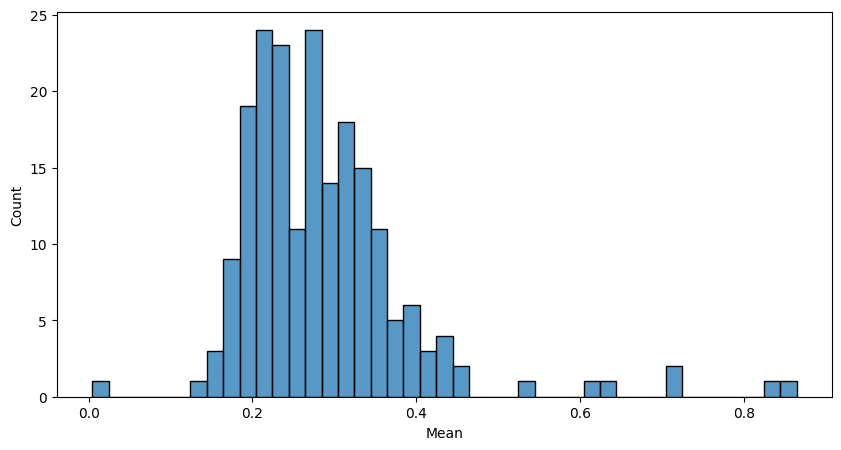

In [28]:
sns.histplot(data = altfiltereddata["Mean"],binwidth=0.02)

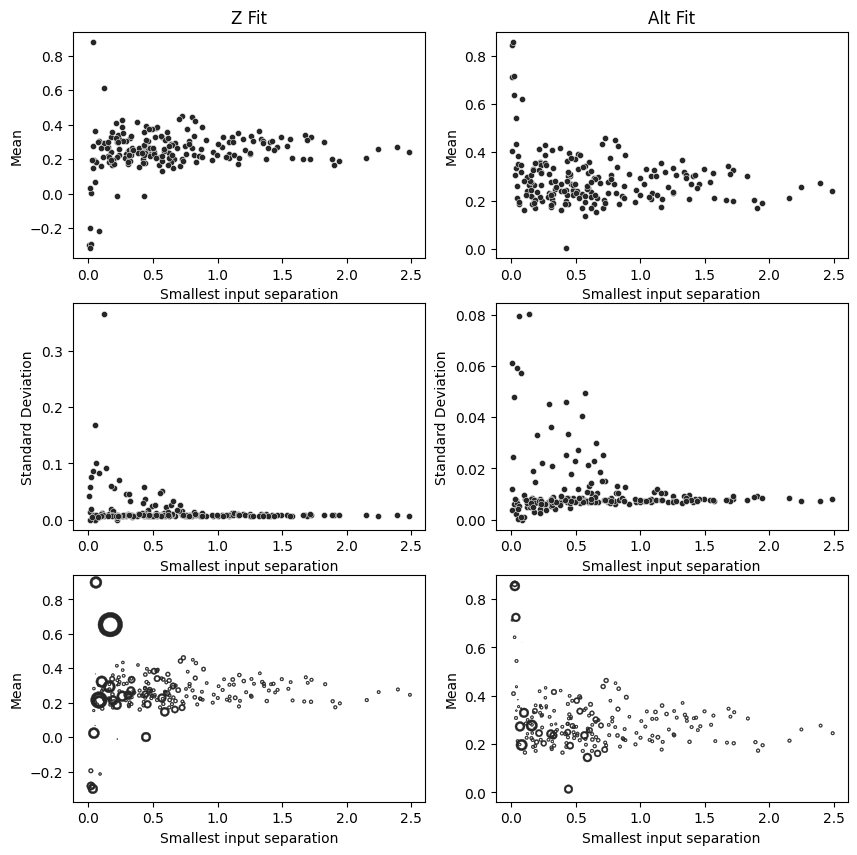

In [24]:
fig, axes = plt.subplots(3, 2)

sns.scatterplot(ax = axes[1,0], y = "Standard Deviation", x = "Smallest input separation",data = filtereddata ,s=20, color=".15")
sns.scatterplot(ax = axes[0,0], y = filtereddata["Mean"], x = filtereddata["Smallest input separation"], s=20, color=".15")
sns.scatterplot(ax = axes[2,0], y = filtereddata["Mean"], x = filtereddata["Smallest input separation"],marker="$\circ$", ec="face", s=2000*filtereddata["Standard Deviation"], color=".15")

sns.scatterplot(ax = axes[0,1], y = altfiltereddata["Mean"], x = altfiltereddata["Smallest input separation"], s=20, color=".15")
sns.scatterplot(ax = axes[1,1], y = "Standard Deviation", x = "Smallest input separation",data = altfiltereddata ,s=20, color=".15")
sns.scatterplot(ax = axes[2,1], y = altfiltereddata["Mean"], x = altfiltereddata["Smallest input separation"],marker="$\circ$", ec="face", s=2000*altfiltereddata["Standard Deviation"], color=".15")
axes[0,0].set_title("Z Fit")
axes[0,1].set_title("Alt Fit")
plt.show()

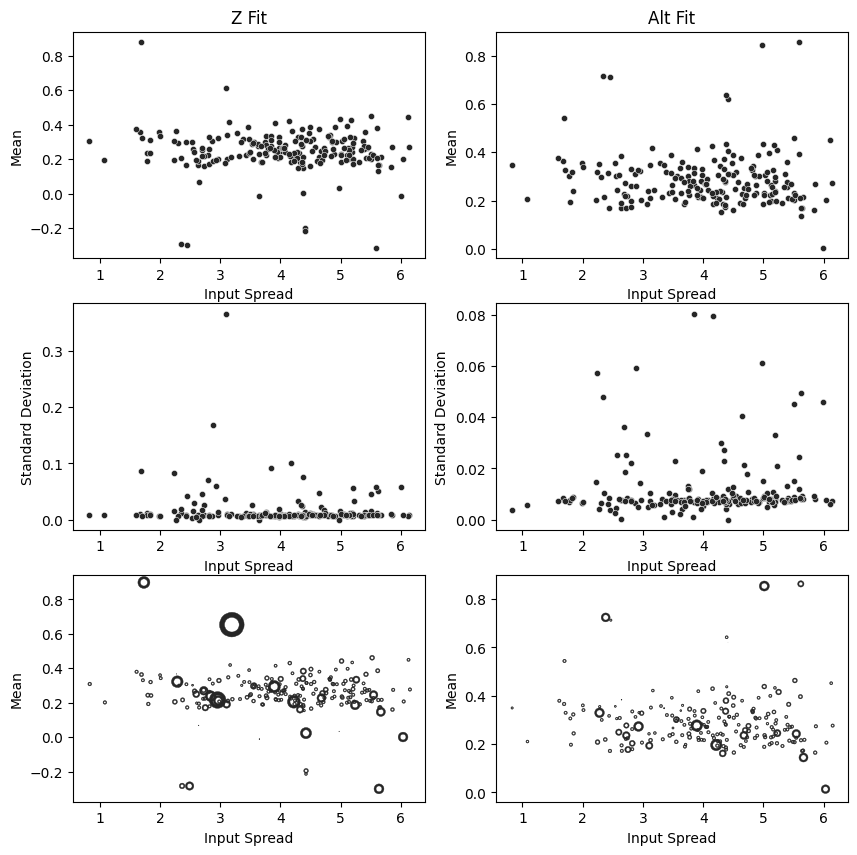

In [25]:
fig, axes = plt.subplots(3, 2)

sns.scatterplot(ax = axes[1,0], y = "Standard Deviation", x = "Input Spread",data = filtereddata ,s=20, color=".15")
sns.scatterplot(ax = axes[0,0], y = filtereddata["Mean"], x = filtereddata["Input Spread"], s=20, color=".15")
sns.scatterplot(ax = axes[2,0], y = filtereddata["Mean"], x = filtereddata["Input Spread"],marker="$\circ$", ec="face", s=2000*filtereddata["Standard Deviation"], color=".15")

sns.scatterplot(ax = axes[0,1], y = altfiltereddata["Mean"], x = altfiltereddata["Input Spread"], s=20, color=".15")
sns.scatterplot(ax = axes[1,1], y = "Standard Deviation", x = "Input Spread",data = altfiltereddata ,s=20, color=".15")
sns.scatterplot(ax = axes[2,1], y = altfiltereddata["Mean"], x = altfiltereddata["Input Spread"],marker="$\circ$", ec="face", s=2000*altfiltereddata["Standard Deviation"], color=".15")
axes[0,0].set_title("Z Fit")
axes[0,1].set_title("Alt Fit")
plt.show()

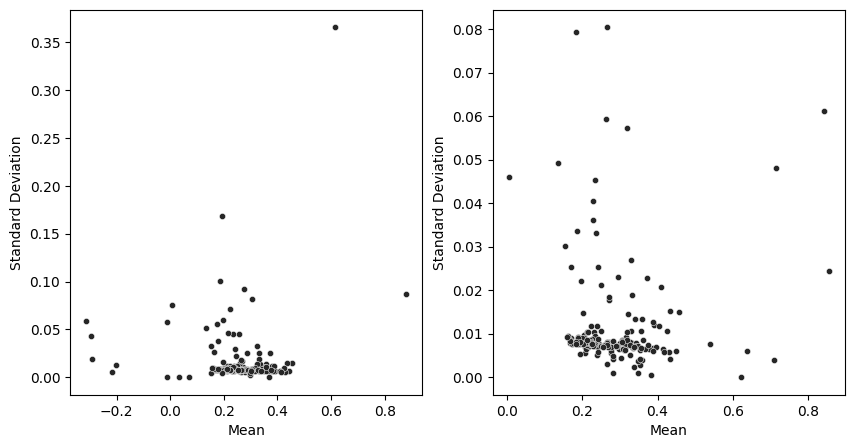

In [26]:
plt.rcParams["figure.figsize"] = (10,5)
fig, axes = plt.subplots(1, 2)


sns.scatterplot(ax = axes[0], y = "Standard Deviation", x = "Mean", data = filtereddata, s=20, color=".15")
sns.scatterplot(ax = axes[1], y = "Standard Deviation", x = "Mean", data = altfiltereddata, s=20, color=".15")
plt.show()